In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import joblib

In [2]:
# Load the dataset
url = "cervical-cancer_csv.csv"
data = pd.read_csv(url)

In [3]:
# Data Cleaning
data.drop(['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'], axis=1, inplace=True)
data.dropna(inplace=True)

In [4]:
data.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [5]:
# Splitting the data
X = data.drop('Biopsy', axis=1)
y = data['Biopsy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Model Training
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

GradientBoostingClassifier()

In [7]:
# Save the model
joblib.dump(model, 'cervical_cancer_model.pkl')

['cervical_cancer_model.pkl']

In [8]:
# Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [9]:
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.9384615384615385
Confusion Matrix:
[[113   5]
 [  3   9]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       118
           1       0.64      0.75      0.69        12

    accuracy                           0.94       130
   macro avg       0.81      0.85      0.83       130
weighted avg       0.94      0.94      0.94       130



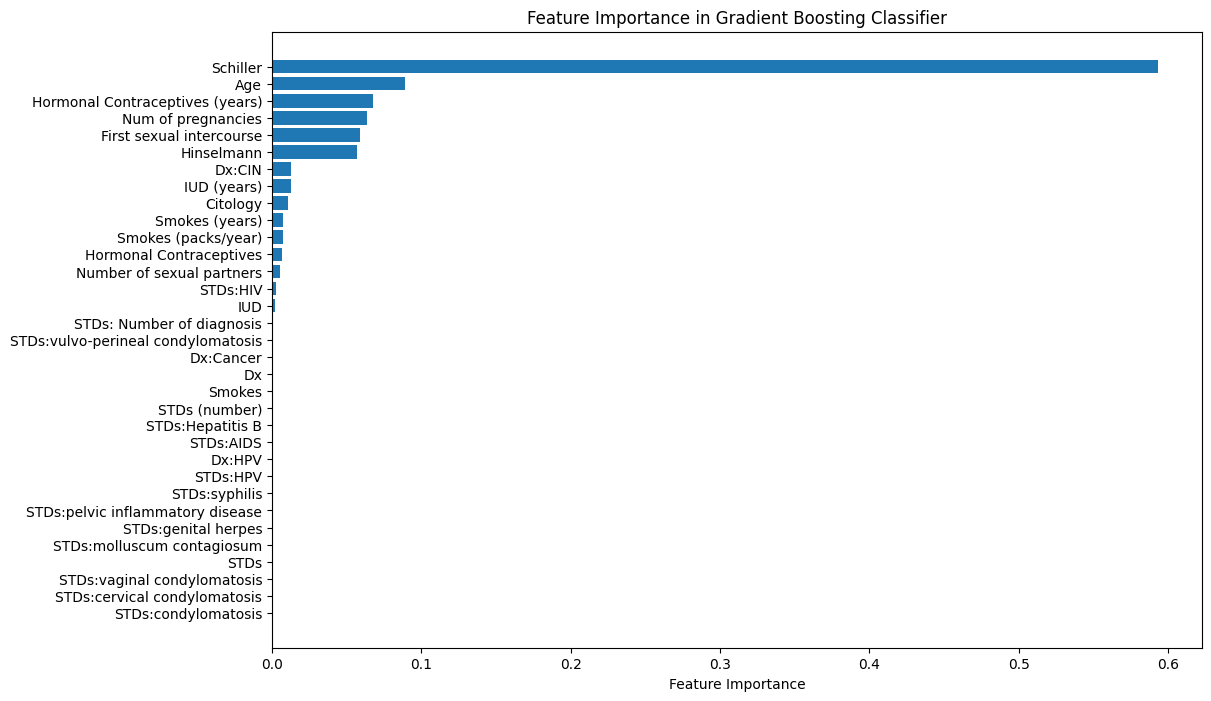

In [10]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(12, 8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), X.columns[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Gradient Boosting Classifier")
plt.show()

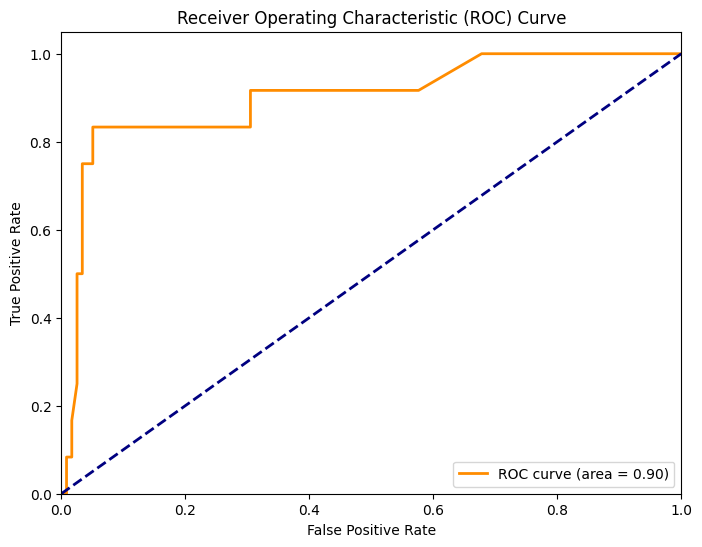

In [11]:
# ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [12]:
data.describe

<bound method NDFrame.describe of      Age  Number of sexual partners  First sexual intercourse  \
0     18                        4.0                      15.0   
1     15                        1.0                      14.0   
3     52                        5.0                      16.0   
4     46                        3.0                      21.0   
5     42                        3.0                      23.0   
..   ...                        ...                       ...   
830   34                        3.0                      18.0   
831   32                        2.0                      19.0   
832   25                        2.0                      17.0   
833   33                        2.0                      24.0   
834   29                        2.0                      20.0   

     Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
0                   1.0     0.0             0.0                  0.0   
1                   1.0     0.0          

In [13]:
# Generate random values for each feature
age = np.random.randint(18, 65)
num_sexual_partners = np.random.randint(0, 10)
first_sexual_intercourse = np.random.randint(10, 30)
num_pregnancies = np.random.randint(0, 10)
smokes = np.random.randint(0, 2)
smokes_years = np.random.randint(0, 40) if smokes == 1 else 0
smokes_packs_per_year = np.random.randint(0, 40) if smokes == 1 else 0
hormonal_contraceptives = np.random.randint(0, 2)
hormonal_contraceptives_years = np.random.randint(0, 20) if hormonal_contraceptives == 1 else 0
iud = np.random.randint(0, 2)
iud_years = np.random.randint(0, 20) if iud == 1 else 0
stds = np.random.randint(0, 2)
stds_number = np.random.randint(0, 10) if stds == 1 else 0
stds_condylomatosis = np.random.randint(0, 2)
stds_cervical_condylomatosis = np.random.randint(0, 2)
stds_vaginal_condylomatosis = np.random.randint(0, 2)
stds_vulvo_perineal_condylomatosis = np.random.randint(0, 2)
stds_syphilis = np.random.randint(0, 2)
stds_pelvic_inflammatory_disease = np.random.randint(0, 2)
stds_genital_herpes = np.random.randint(0, 2)
stds_molluscum_contagiosum = np.random.randint(0, 2)
stds_aids = np.random.randint(0, 2)
stds_hiv = np.random.randint(0, 2)
stds_hepatitis_b = np.random.randint(0, 2)
stds_hpv = np.random.randint(0, 2)
stds_number_of_diagnosis = np.random.randint(0, 10)
dx_cancer = np.random.randint(0, 2)
dx_cin = np.random.randint(0, 2)
dx_hpv = np.random.randint(0, 2)
dx = np.random.randint(0, 2)
hinselmann = np.random.randint(0, 2)
schiller = np.random.randint(0, 2)
citology = np.random.randint(0, 2)

# Create a new data point with all the generated values
new_data = np.array([
    [
        age, 
        num_sexual_partners, 
        first_sexual_intercourse,
        num_pregnancies, 
        smokes, 
        smokes_years, 
        smokes_packs_per_year, 
        hormonal_contraceptives, 
        hormonal_contraceptives_years,
        iud,
        iud_years,
        stds,
        stds_number,
        stds_condylomatosis,
        stds_cervical_condylomatosis,
        stds_vaginal_condylomatosis,
        stds_vulvo_perineal_condylomatosis,
        stds_syphilis,
        stds_pelvic_inflammatory_disease,
        stds_genital_herpes,
        stds_molluscum_contagiosum,
        stds_aids,
        stds_hiv,
        stds_hepatitis_b,
        stds_hpv,
        stds_number_of_diagnosis,
        dx_cancer,
        dx_cin,
        dx_hpv,
        dx,
        hinselmann,
        schiller,
        citology
    ]
])


# Load the model
model = joblib.load('cervical_cancer_model.pkl')

# Make a prediction
prediction = model.predict(new_data)
prediction_proba = model.predict_proba(new_data)

# Convert probabilities to percentages
prediction_proba_percent = prediction_proba * 100
print(prediction_proba_percent)
# Display the results
print(f"Prediction: {prediction[0]} (1 indicates cancer, 0 indicates no cancer)")
print(f"Prediction Probability: {prediction_proba_percent[0][1]:.2f}% chance of cancer, {prediction_proba_percent[0][0]:.2f}% chance of no cancer")


[[39.23453894 60.76546106]]
Prediction: 1 (1 indicates cancer, 0 indicates no cancer)
Prediction Probability: 60.77% chance of cancer, 39.23% chance of no cancer


c:\Projects\Python\ML\cervical\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
c:\Projects\Python\ML\cervical\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
